<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/DBScan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Clustering
The [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm views clusters as areas of high density separated by areas of low density.

Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

The central component to the DBSCAN is the **concept of core samples, which are samples that are in areas of high density**. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).
![dbscan](https://3.bp.blogspot.com/-rDYuyg00Z0w/WXA-OQpkAfI/AAAAAAAAI_I/QshfNVNHD_wXJwXEipRIVzDSX5iOEAy2wCEwYBhgL/s1600/DBSCAN_Points.PNG)

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Make moon-shaped and doughnut-shaped data¶

In [2]:
from sklearn import cluster, datasets

In [3]:
n_samples = 1500
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1)

In [4]:
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

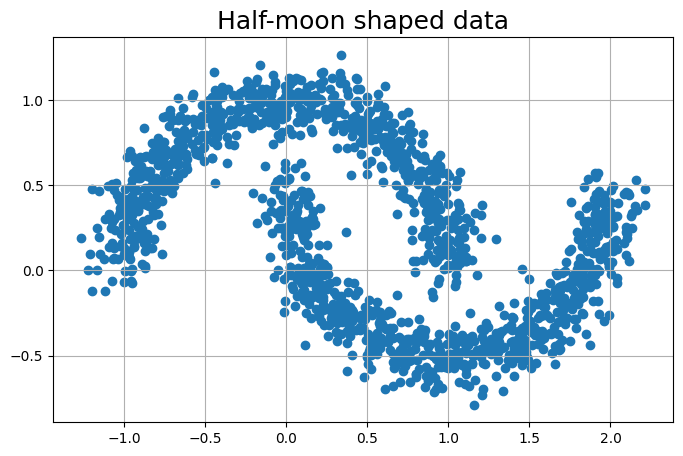

In [5]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.show()

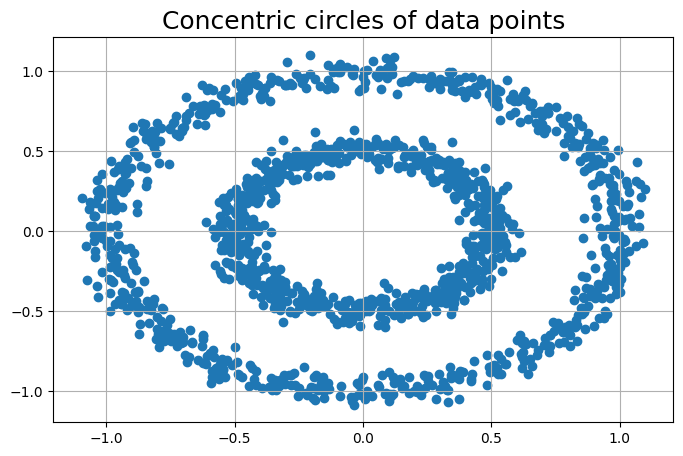

In [6]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.show()

## Can k-means identify the right clusters?

In [7]:
km=cluster.KMeans(n_clusters=2)

In [8]:
km.fit(noisy_moons)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

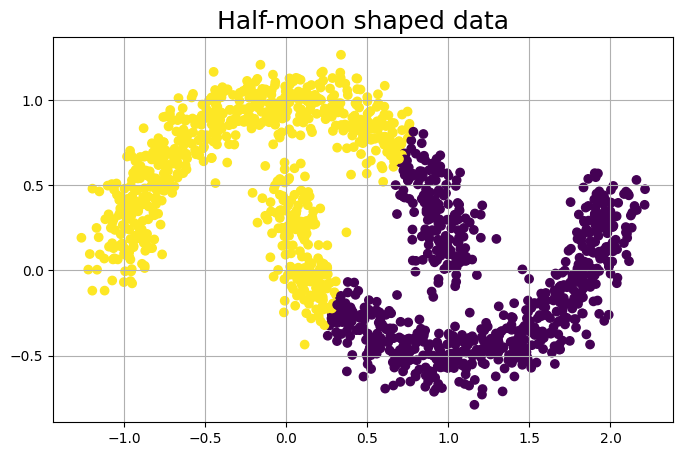

In [9]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.show()

In [10]:
km.fit(noisy_circles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

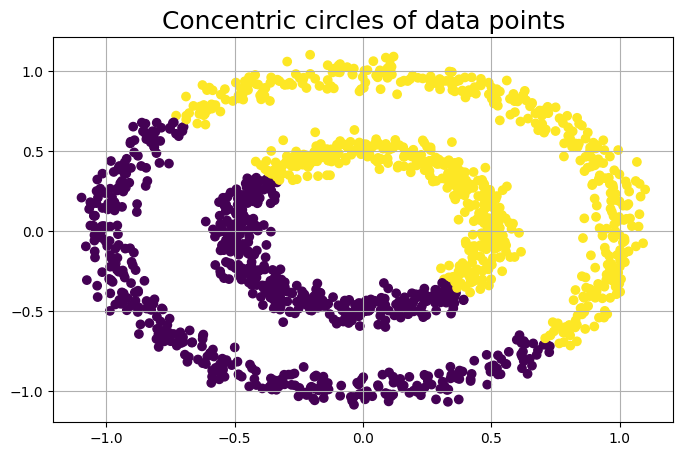

In [11]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.show()

## How does DBSCAN perform?

In [12]:
dbs = cluster.DBSCAN(eps=0.1)

In [13]:
dbs.fit(noisy_moons)

DBSCAN(eps=0.1)

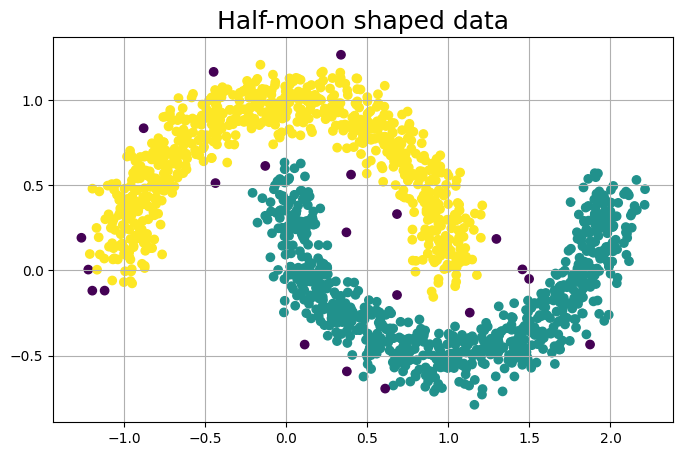

In [14]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.show()

In [15]:
dbs.fit(noisy_circles)

DBSCAN(eps=0.1)

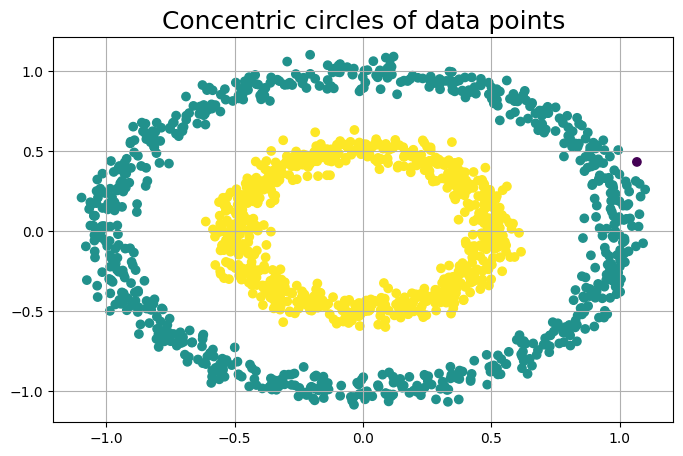

In [16]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.show()